<a href="https://colab.research.google.com/github/rolandocj/hello-world/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
#se crean conjuntos de validación y se normalizan
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
#definicion del modelo: se agregan capas, con sus funciones de activacion
keras.backend.clear_session()
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
#compilacion del modelo: requiere optimizador, funcion de costo y metricas a evaluar
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [5]:
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/40
55000/55000 [==============================] - 6s 102us/sample - loss: 0.7222 - acc: 0.7637 - val_loss: 0.5724 - val_acc: 0.7886
Epoch 2/40
55000/55000 [==============================] - 5s 95us/sample - loss: 0.4882 - acc: 0.8296 - val_loss: 0.4910 - val_acc: 0.8366
Epoch 3/40
55000/55000 [==============================] - 5s 98us/sample - loss: 0.4421 - acc: 0.8449 - val_loss: 0.4210 - val_acc: 0.8564
Epoch 4/40
55000/55000 [==============================] - 5s 98us/sample - loss: 0.4150 - acc: 0.8549 - val_loss: 0.4088 - val_acc: 0.8600
Epoch 5/40
55000/55000 [==============================] - 5s 99us/sample - loss: 0.3946 - acc: 0.8616 - val_loss: 0.3877 - val_acc: 0.8680
Epoch 6/40
55000/55000 [==============================] - 5s 96us/sample - loss: 0.3791 - acc: 0.8655 - val_loss: 0.3924 - val_acc: 0.8674
Epoch 7/40
55000/55000 [==============================] - 5s 95us/sample - loss: 0.3667 - acc: 0.8708 - val_loss: 0.

In [6]:
history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 40,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
 'samples': 55000,
 'steps': None,
 'verbose': 0}

In [7]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

In [8]:
history.history

{'acc': [0.76365453,
  0.82963634,
  0.8449091,
  0.8549273,
  0.86161816,
  0.86554545,
  0.8708,
  0.8740909,
  0.87912726,
  0.8808909,
  0.8836,
  0.8859091,
  0.88905454,
  0.8919273,
  0.8927636,
  0.8952182,
  0.8969273,
  0.8996364,
  0.9012909,
  0.90367275,
  0.90436363,
  0.90596366,
  0.9084,
  0.9103091,
  0.9116,
  0.9116727,
  0.91507274,
  0.91516364,
  0.9162545,
  0.9193091,
  0.9196909,
  0.92176366,
  0.9232727,
  0.92309093,
  0.92392725,
  0.9251636,
  0.92692727,
  0.92776364,
  0.9294909,
  0.9301818],
 'loss': [0.7222081437631087,
  0.4882244153282859,
  0.4421164199655706,
  0.4150105364582755,
  0.39462207229787655,
  0.3791052909244191,
  0.36668511449857194,
  0.3544778652754697,
  0.34390391127196224,
  0.3354132461157712,
  0.32636823506355284,
  0.31899478408856824,
  0.3112256101023067,
  0.30325401151180265,
  0.2985534891345284,
  0.29194570183753965,
  0.2867438265995546,
  0.28089791024814953,
  0.27551969482898714,
  0.2696556229504672,
  0.2654955

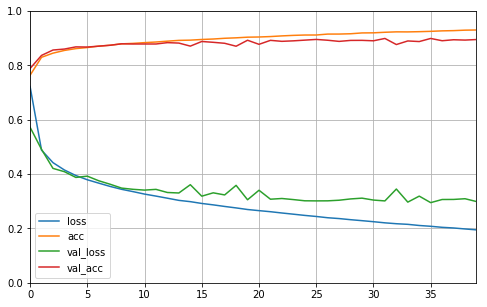

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [10]:
#evaluacion del modelo
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 43us/sample - loss: 68.7232 - acc: 0.8499


[68.72315517244338, 0.8499]

In [11]:
#prediccion
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [13]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)